<center> <h1> First assignment Machine Learning <h1></center>

<center>
    <img src="https://miro.medium.com/max/1400/1*hXK4F_vFtG-fh2BrxDolFg.jpeg" width="300" alt="cognitiveclass.ai logo"  />
</center>

# K-Nearest Neighbors

This script describes 2 recentlly learned algorithms in Machine Learning course. 

KNN & ANN 

In this script we will load a picture related dataset, fit the data, and use K-Nearest Neighbors to predict a data point's nearest neigbor. But what is K-Nearest Neighbors?

K-Nearest Neighbors is an algorithm for supervised and unsupervised learning. In our case, unsupervise, meaning the data is not labeld and classified at first. We will 'train'  the data so we would find for each point in our  testing set, it's closest (by euclidean distance) and therfore it's best match. 

<h1>Contents:</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
         <li><a href="#KNN"> Question 1: KNN</a></li>
         <li><a href="#ANN">Question 2: ANN</a></li>
                <li><a href="#accurecy">Question 3 part 1: Accuracy</a></li>
        <li><a href="#pillow">Question 3 part 2:  Best 10 neigbors shown on pictures</a></li>
        <li><a href="#greed">Question 4:  Optimaizing hyper parameter using grid search</a></li>
        <li><a href="#5best">Question 5: 5 Best hyperparameters with best accuracy </a></li>
        <li><a href="#10runs">Question 6: 10 runs - different results</a></li>
        <li><a href="#sklearn">Question 7: sklearn - nearest neighbor</a></li>
    </ol>
</div>
<br>
<hr>



### All the libraries we will use in our assignment:

In [1]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')
import matplotlib.cm as cm

####  We chose as the training data 'Hananya1'
#### 'Hananya2' as testing data

For 'Hananya1' (our training data) , we removed the name of each point (i.e: 'X', 'Y', 'scale', 'angle' , columns- for convenient purpose, when selecting a feature to split by in the ANN algorithm (implemented by KD tree )


In [2]:
X_train_Hananya1 = pd.read_csv('/Users/omers/gil_hw/Hananya1.csv')
X_train_Hananya1 = pd.DataFrame(X_train_Hananya1)

X_test_Hananya2 = pd.read_csv('/Users/omers/gil_hw/Hananya2.csv')
X_test_Hananya2 = pd.DataFrame(X_test_Hananya2)

X_train_Hananya1_ANN = X_train_Hananya1.drop(columns=['X', 'Y', 'scale', 'angle'])
X_test_Hananya2_ANN = X_test_Hananya2.drop(columns=['X', 'Y', 'scale', 'angle'])




<div id="KNN">
    <h2>Question 1: KNN:</h2>
</div>

### Description:
   KNN algorithm finds for each point in our data it's nearest neighbor. In our case 'nearness' would be messured by euclidean distance.
    
   KNN algorithm is 'brute force' which means this algorithm is trying every possibility rather than advanced techniques to improve efficiency.

#### euclidean_distance function:
calculates the euclidean distance between 2 given sets of points

#### kneighbors function:
by calculating the distance between the given point and all the data in the training data, returns the k nearest neigbors of that point

#### fit finction:
returns the lable of the point, in our case the lable of a point is it's index.

*** we will not use fit method in this assigement becaue our data's labels are meaningless (unsupervised learning). But we would find this function usful in a supervised learning, therfore we chose to include it

In [3]:
class KNN:
    def __init__(self, data):
         self.data=data

    # Calculate the Euclidean distance between two vectors

    def euclidean_distance(self, row1, row2):
        distance = 0.0
        for i in range(len(row1)):
            distance += (row1[i] - row2[i]) ** 2
        return math.sqrt(distance)

    
    def fit(self, vec):
        row_num = np.where(self.data == vec)
        return row_num


                
    def kneighbors(self, test_row, num_neighbors):
        distance= list()
        for row_train in self.data: 
            dis = self.euclidean_distance(test_row,row_train) 
            distance.append(dis)
        distance = np.sort(distance)
       
        return distance[:num_neighbors]



We converted the data frames to numpy arrays for distance calculation.
This makes the algorithm work faster :

In [4]:
X_train_Hananya1_np = X_train_Hananya1.to_numpy()
X_test_Hananya2_np = X_test_Hananya2.to_numpy()

#### predict_k_neighbors list:

contain the nearest neigbor according to KNN algorithm (by index) & the distance from it

In [5]:
predict_k_neighbors = list()
knn = KNN(X_train_Hananya1_np)
i=0
for point in X_test_Hananya2_np:
    predict_k_neighbors.append(knn.kneighbors(X_test_Hananya2_np[i], 1))
    i+=1

In [6]:
prediction= list()

for k in range(0,len(predict_k_neighbors)):
    prediction.append(predict_k_neighbors[k][0])




#### prediction list:
contains the nearest neihgbors by KNN algorithm:

In [7]:
prediction[:10]

[125.32527727876767,
 386.31099689757735,
 237.02067568252352,
 181.40297787247044,
 174.3869128145802,
 292.9137360879479,
 258.00651316585015,
 123.80616418014088,
 408.1716905286304,
 348.3014224332137]

<div id="ANN">
    <h2>Question 2 : ANN</h2>
</div>

### Description:
   ANN algorithm finds for each point in our data it's approximate nearest neighbor.
    
   We chose to implement the algorithm using RKDT- we build a forest of kd trees using our training data. 
   
   each tree will be build using randommly selected feature.
   
   This way we can insure different trees in our forest. 
   
   Each time we will 'ask' all the trees in our forest for their classifocation, tally all the votes, and the highest voted point would be our classification as the nearest neighbor of the point 
   
   

### Class node :
The data structure of the KD tree 

each node contains:

the feature the data splits by 

the location which is the median for of the feature

the data which are all the points reached that node by the split so far

and the left and right nodes, which are the children of the node.

In [8]:
class node:
    def _init_(self):
        self.location = None #median
        self.feature = None
        self.data = None
        self.leftChild = None
        self.rightChild = None
 
                 # -------------------- setters of node class: --------------------
    
    def set_location(self, median):
        self.location = median

    def set_data(self, data):
        self.data = data

    def set_feature(self, feature):
        self.feature = feature
        
    def set_leftChild(self, child):
        self.leftChild = child
    
    def set_rightChild(self, child):
        self.rightChild = child
        
                  # -------------------- getters of node class: --------------------  
            
    def get_rightChild(self):
        return self.rightChild
     
    def get_leftChild(self):
        return self.leftChild

    def get_location(self ):
        return self.location

    def get_feature(self):
        return self.feature
    
    def get_data(self):
        return self.data

#### euclidean_distance function:
Calculating euclidean distance between 2 given points with n dimantions

In [9]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return math.sqrt(distance)


### class ANN :

    As hyperparameters: number of leaves and number of trees
#### fit function:
recursivly creates KD trees according to hyperparameters passed.
the KD tree is build using the node class, described erlier.
each time a feature is randomlly chosen as the split of the node to its right and left children:
a median of that feature is calculated and point with higher values in that preticular feature will pass the the right child node. And lower value will go to the left child node.
the tree will finish bulding once the leave size is reached to the hyperparameter.

#### kneighbors function:
Given a tree and a point, the function finds the points k-nearest neighbor.
By passing the point trough the tree, each node we check if the value of the point's feature is greater or smaller than the median of that feature.
If greater -> right node else: left.Until we reach the leave node.
We then collect all the votes (lists of indexes of points suspected to be the nearest neighbor) from all the tree in out forest and unit them.
Then we choose the most voted neighbor.


In [10]:
class ANN:
    def __init__(self, num_leafs, num_trees , train):
        self.num_trees = num_trees
        self.num_leafs = num_leafs
        self.train = train
        
    def fit(self, pointList ):

        if len(pointList) <= self.num_leafs :
            return None
       
        # Choose a feature to split the data by: 
        feat = np.random.randint(1,X_train_Hananya1_ANN.shape[1])
        # Sort point list 
        sorted_points = pointList.sort_values('feature'+str(feat))
        # Median as pivot element:
        median = sorted_points['feature'+str(feat)].median()
        
        # Create node and construct subtree
        my_node= node()
        my_node.set_feature(feat)
        my_node.set_location(median)
        my_node.set_data(pointList)
        my_node.set_leftChild(self.fit(sorted_points[:math.floor(len(pointList)/2)])),
        my_node.set_rightChild(self.fit(sorted_points[math.floor(len(pointList)/2)+1:]))
        
        return my_node
    
    
        # k nearest neighbors
    def kneigbors(self, forest, point , k):
      
        predictions = []

        for kd_node in forest:
            data= list()
            while kd_node != None :
                data = kd_node.get_data()

                if point['feature'+str(kd_node.get_feature())] <= kd_node.get_location():
                    kd_node = kd_node.get_leftChild()
                else:
                     kd_node = kd_node.get_rightChild()
       
            predictions += data.index.tolist() #Saves all the votes from all the trees; by index

          
        nearest_n = max(predictions, key=predictions.count) #Gets the most voted point
        predictions_2 = [x for x in predictions if x != nearest_n] # Gets the second nearest point 
        second_nearest = max(predictions_2, key=predictions_2.count) 
        
        return nearest_n

        

forest is a list containing all our trees for the RKDT

Here we initializing the ann with the hyperparameters:

In [11]:
forest = list()
num_leaves = 20
num_trees= 60
ann= ANN(num_leaves,num_trees,X_train_Hananya1_ANN)
for i in range(0, num_trees):
    forest.append(ann.fit(X_train_Hananya1_ANN))

#### ann_result list:
Contains all the nearest nehigbors for all the points in the test data. 


In [12]:
ann_result = list()
for i in range(0, X_test_Hananya2.shape[0]):
     ann_result.append(ann.kneigbors(forest,X_test_Hananya2_ANN.iloc[i],1))
   

#### ann_result list:
saves all the points (by index) that was classified as nearest neighbor by the ANN algorithm.

Here we are showing 10 values:

In [13]:
ann_result[:10]

[132, 223, 122, 36, 2, 575, 63, 86, 264, 265]

#### ann_distance list:
Saves all the calculeted distances between the points found by the ANN algorithm and the point in the testing data

In [14]:
ann_distance=list()
neig = np.array(ann_result)
i=0

for i in range(0, X_test_Hananya2.shape[0]):
    ann_distance.append(euclidean_distance(X_test_Hananya2.loc[i],X_train_Hananya1.loc[neig[i]] ))

#saves the indexes of the test- which indicates the points of the test data
numlist= list()
for i in range(0, X_test_Hananya2.shape[0]):
    numlist.append(i)


Here is an example of 10 values of ann_distance:

In [15]:
ann_distance[:10]

[189.89382833836387,
 473.4803476481363,
 440.5482055133127,
 289.47605879588724,
 346.6904734774234,
 365.0753075750262,
 403.912513820753,
 123.80616418014088,
 600.8327246780088,
 596.8536086520714]

Combining all the lists to 1 data frame for convenience purposes

In [16]:
ann_distance = pd.DataFrame(ann_distance)
ann_distance.columns =['distance']
neig=pd.DataFrame(neig)
neig.columns =['neighbor']
numlist = pd.DataFrame(numlist)
numlist.columns =['point']
ann_result_with_distance = pd.concat([neig,numlist, ann_distance], axis=1)

ann_results_best10 data frame stores the 10 best neighbors, meaning the 10 closest points calculated by ANN algorithm

In [17]:
ann_results_best10 = ann_result_with_distance.sort_values('distance').head(10)

In [18]:
ann_results_best10

,neighbor,point,distance
206,68,206,88.873952
451,43,451,99.479299
604,189,604,103.922139
7,86,7,123.806164
853,308,853,139.716375
580,323,580,147.961822
912,10,912,154.195730
909,14,909,157.447689
584,304,584,157.848616
52,79,52,160.376586


Create 2 data frames for presenting  (section 3)

In [19]:
df_to_show_train = ann_results_best10['neighbor']
df_to_show_test = ann_results_best10['point']
train_10_best = list()
test_10_best = list()
for index in df_to_show_test:
    test_10_best.append(X_test_Hananya2.loc[index])
for index in df_to_show_train:
    train_10_best.append(X_train_Hananya1.loc[index])    

    
train_10_best =pd.DataFrame(train_10_best)
test_10_best =pd.DataFrame(test_10_best)

<div id="accurecy">
    <h2>Question 3 part 1: Accuracy</h2>
</div>

We will define the average error  ε  such that:
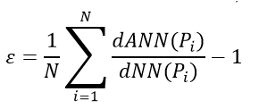

### Where:

dANN : Distance of closest neigbor of the given point P 

dNN  : Distance found by ANN algorithm 



In [20]:
def accuracy (ann_distance, pred):
    sum_of_distances = 0 
    for i in range(0,913):
        knn_neigbor= pred[i]
        ann_neigbor = ann_distance[i]
     
        sum_of_distances += (ann_neigbor/knn_neigbor)
      

  
    epsilon = (1/X_test_Hananya2.shape[0]*sum_of_distances) -1
    accuracy = 1-epsilon 

    return epsilon

<div id="pillow">
    <h2>Question 3 part 2: Best 10 neighbors shown on pictures</h2>
</div>

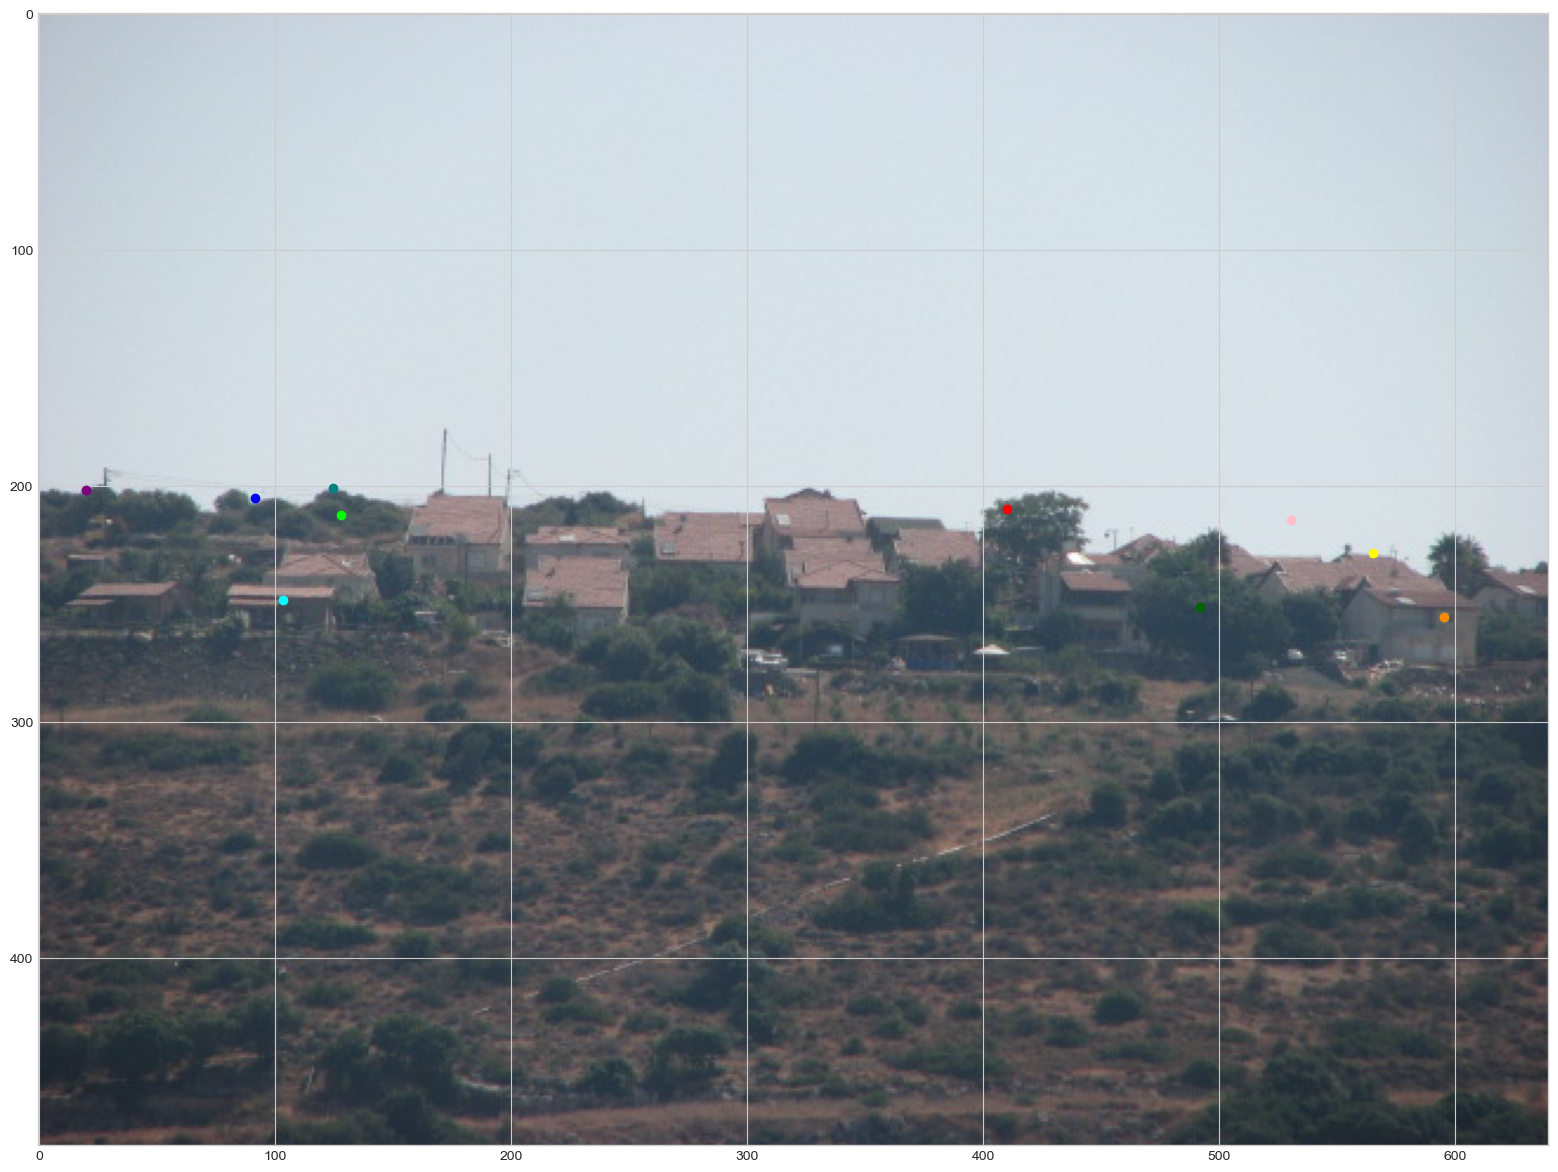

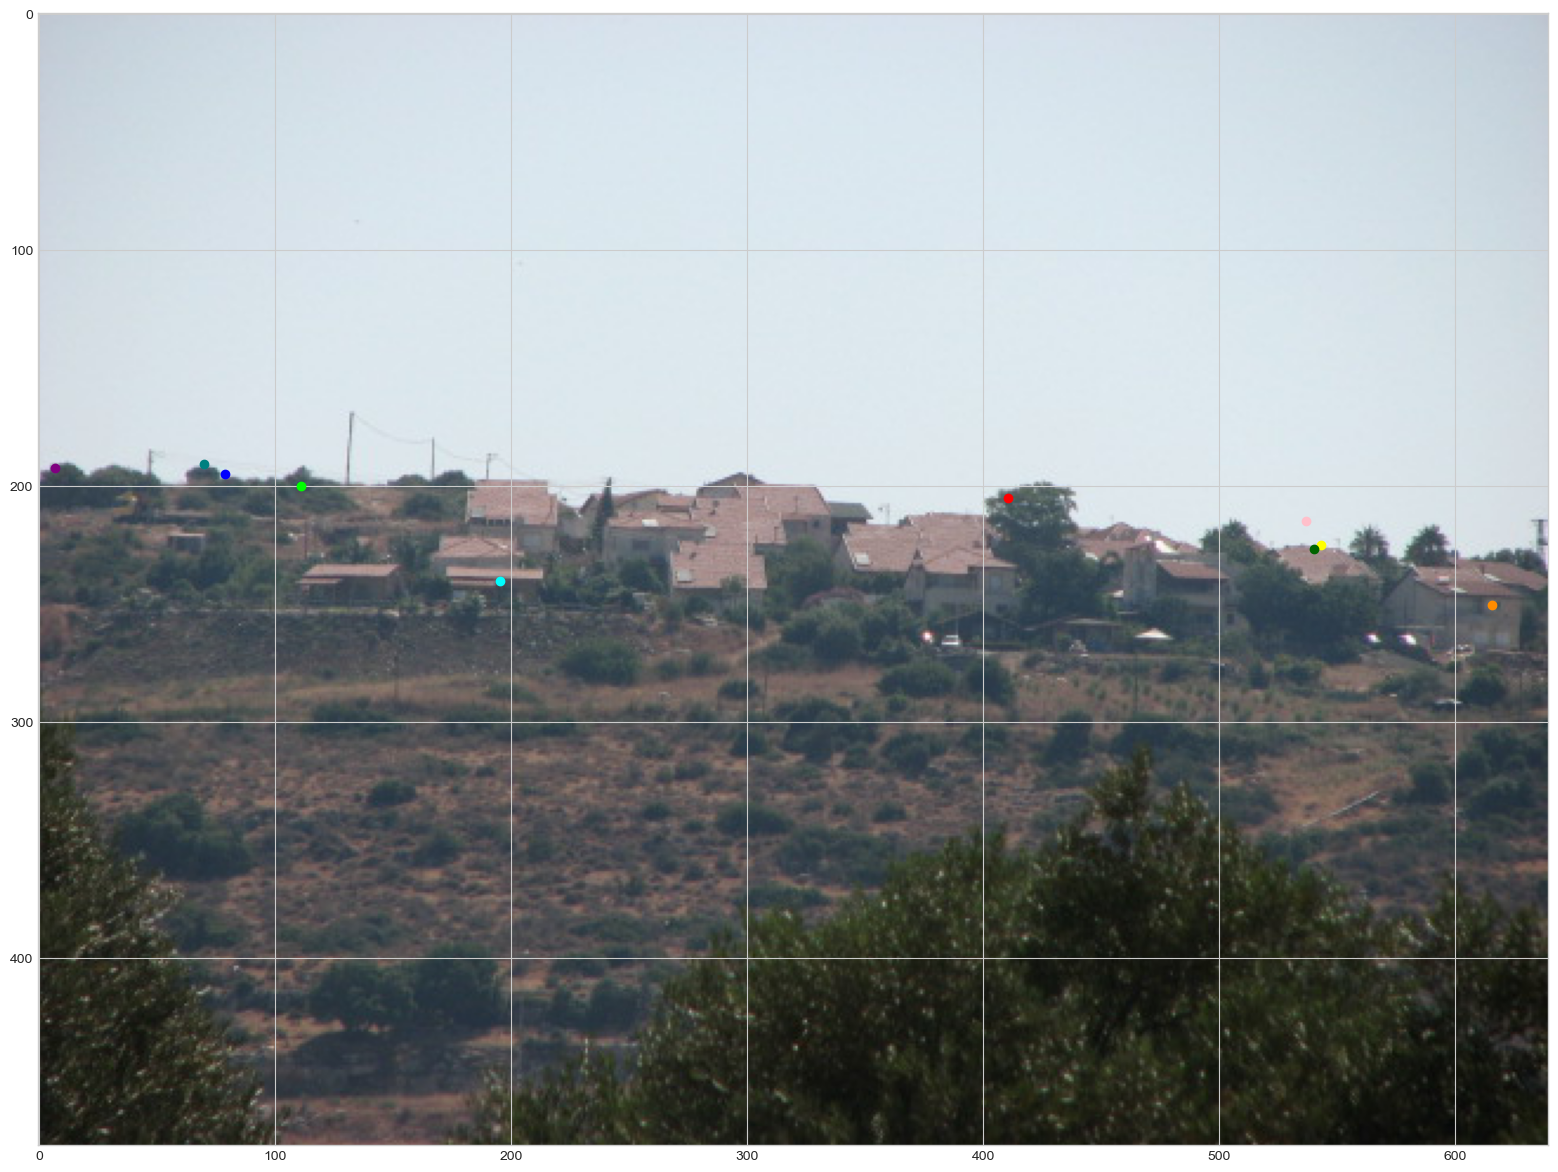

In [153]:
                    # ----- Figure to present the Hanaya1 which is our training data -----

figure(figsize=(21, 15), dpi=100)
img = mpimg.imread('/Users/omers/gil_hw/Hananya1.JPG')
imgplot = plt.imshow(img)
colors = ['red', 'blue' ,'yellow', 'pink', 'darkgreen', 'darkorange', 'teal', 'purple' , 'cyan' , 'lime']

for y in range(0,10):
    plt.scatter(train_10_best.X.values[y], train_10_best.Y.values[y], color=colors[y])
plt.show()
plt.close()

                    # ----- Figure to present the Hanaya which is our testing data -----
    
figure(figsize=(21, 15), dpi=100)
img = mpimg.imread('/Users/omers/gil_hw/Hananya2.JPG')
imgplot = plt.imshow(img)
colors = ['red', 'blue' ,'yellow', 'pink', 'darkgreen', 'darkorange', 'teal', 'purple' , 'cyan' , 'lime']
for y in range(0,10):
    plt.scatter(test_10_best.X.values[y], test_10_best.Y.values[y], color=colors[y])
plt.show()
plt.close()




## Explanation of dots:
Most of the dots where correctlly classified.
We can see that the more distincit the features are- we get better results. 
here we have a picture containing alot of green and brown shades, which are quit defficult to distinguish.
But, as we can see, when it came to the houses( the most uniqe ones- feature wise), a better match was made.

The only dot trully purely classified was the dark green dot.


<div id="greed">
    <h2> Question 4:  Optimaizing hyper parameter using grid search </h2>
</div>

### Here we are performing the grid saerch in order to find the best hyperparameter for our ANN algorithm:

#### best10_result function: 
Recieves as parameters the hyperparameters we want to examine.
We than calculate the running time of our algorithm and its accuracy.
The results will be kept so we could make an observation - which hyperparameres produce the best result, i.e:

a balanced cobination between the least amount of running time & best accuracy. 


In [24]:
import time

#measuring runing time and calculating epsilon value
def best10_result(num_leaves, num_trees):
    time_and_epsilon =list() #contains time of the run and the value of epsilon
    #start measuring
    forest = list()
     #start measuring
    start = time.time()
    ann= ANN(num_leaves,num_trees,X_train_Hananya1_ANN)
    for i in range(0, num_trees):
        forest.append(ann.fit(X_train_Hananya1_ANN))
        ann_result = list()
    for i in range(0, X_test_Hananya2.shape[0]):
         ann_result.append(ann.kneigbors(forest,X_test_Hananya2_ANN.iloc[i],1))
    #stop here
    stop = time.time()
    runnig_time = stop - start
    
    ann_distance=list()
    neig = np.array(ann_result)
    i=0

    for i in range(0, X_test_Hananya2.shape[0]):
        ann_distance.append(euclidean_distance(X_test_Hananya2_ANN.loc[i],X_train_Hananya1_ANN.loc[neig[i]] ))


    epsilon = accuracy(ann_distance, prediction) 
    time_and_epsilon.append(epsilon)
    
    return epsilon, runnig_time

Here we call our ANN algorithm with 10x10 different combinations of hyperperemeter.
We will measure the time for each pair( number of trees and number of leaves ) and the accuracy.
Our goal is to find the pair of hyperparameters that preduces the combination of lowest time of runnig and higest accuracy (lowest epsilon)

In [25]:
#4
#N0 ,LO
time_result = list()
epsilon_result = list()
leaves = list([ 10, 20, 30, 40, 50])
trees = list([ 20, 30, 40, 50, 60])

for i in range(0,len(leaves)):
    for j in range(0,len(leaves)):
        epsilon ,runing_time =best10_result(leaves[i],trees[j])
        epsilon_result.append(epsilon)
        time_result.append(runing_time)                                    

 <img src="http://i.bittwiddlers.org/LTZ.png" width="300" alt="cognitiveclass.ai logo"  />

Prepering the data for showing in graph:

In [26]:
n_leaves =list()
n_trees =list()
for i in leaves:
    for j in trees:
        n_leaves.append(i)
        n_trees.append(j)

n_leaves =pd.DataFrame(n_leaves)
n_leaves.columns =['n_leaves']

n_trees =pd.DataFrame(n_trees)
n_trees.columns =['n_trees']

leavs_trees = '(' + n_leaves['n_leaves'].astype(str)+ ","+ n_trees['n_trees'].astype(str)+ ")"
leavs_trees= pd.DataFrame(leavs_trees)

Accuracy= 1 - np.array(epsilon_result)
Accuracy =pd.DataFrame(Accuracy)
epsilon_result= pd.DataFrame(epsilon_result)
time_result=pd.DataFrame(time_result)

epsilon_results = pd.concat([leavs_trees,Accuracy,epsilon_result, time_result], axis=1)
epsilon_results.columns =['leave_trees', 'Accuracy', 'epsilon','time']

epsilon_results[:10]

,leave_trees,Accuracy,epsilon,time
0,"(10,20)",0.767427,0.232573,2.474028
1,"(10,30)",0.822513,0.177487,4.211088
2,"(10,40)",0.855012,0.144988,6.542583
3,"(10,50)",0.868542,0.131458,9.308201
4,"(10,60)",0.889884,0.110116,12.558300
5,"(20,20)",0.796550,0.203450,4.942179
6,"(20,30)",0.835066,0.164934,10.333319
7,"(20,40)",0.846520,0.153480,17.812271
8,"(20,50)",0.877191,0.122809,27.441166
9,"(20,60)",0.880218,0.119782,38.785848


<div id="5best">
    <h2>Question 5: 5 Hyperparameters with lowest running, given epsilon value </h2>
</div>

#### best_running_time function:
Recieves an epsilon value as parameter and returns the 5 best pairs of hyperparameters according to runnig time:

In [27]:
def best_running_time(epsilon):
    epsilon_5_best =epsilon_results[epsilon_results.epsilon <= epsilon]
    return epsilon_5_best.sort_values('time').head(5)

In [28]:
five_fast_accurate = best_running_time(epsilon_results.sort_values('epsilon').head(5).iloc[0][1])
five_fast_accurate

,leave_trees,Accuracy,epsilon,time
0,"(10,20)",0.767427,0.232573,2.474028
1,"(10,30)",0.822513,0.177487,4.211088
5,"(20,20)",0.796550,0.203450,4.942179
2,"(10,40)",0.855012,0.144988,6.542583
3,"(10,50)",0.868542,0.131458,9.308201


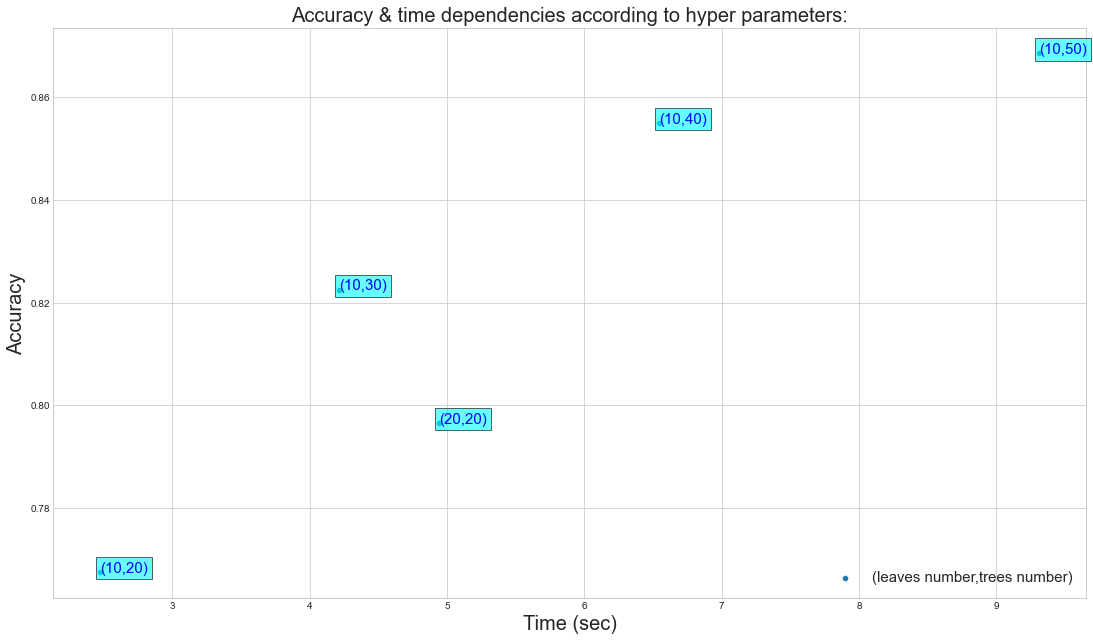

In [29]:
import matplotlib
sns.scatterplot(data=five_fast_accurate,x= 'time',y='Accuracy')
plt.title('Accuracy & time dependencies according to hyper parameters:', fontsize= 20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
for i in range(five_fast_accurate.shape[0]):
    plt.text(x=five_fast_accurate.time[five_fast_accurate.index[i]],
             y=five_fast_accurate.Accuracy[five_fast_accurate.index[i]],
             s=five_fast_accurate.leave_trees[five_fast_accurate.index[i]], 
          fontdict=dict(color='blue',size=15),
          bbox=dict(facecolor='cyan',alpha=0.6))
plt.legend(['(leaves number,trees number)'], loc='lower right',fontsize= 15)
plt.xlabel('Time (sec)' ,fontsize= 20 )
plt.ylabel('Accuracy',fontsize= 20)
plt.show()
plt.close()   

### Conclusions from the plot:
Each label represents the (leave number , tree number).

As we can see -> the larger the forest, i.e: bigger number the trees, the accuracy is better (epsilon is smaller).
But the running time is increasing as well.

We can see the rate of growth (in accuary and time) is very fast in the small values of trees and leaves. But, as the accuracy increases and reaches very closely to 100% , the growth rate  significantly reduces.

That means that we can improve our algorithm's preformances by increasing the number of trees in our forest, but it would be small affect at some point, and very time consuming.


<div id="10runs">
    <h2> Question 6:  10 runs - different results:</h2>
</div>

In [76]:
from timeit import default_timer as timer


def run_best_10(num_leaves , num_trees):
    
    
    start = timer()
    ann_10 = ANN(num_leaves, num_trees,X_train_Hananya1_ANN)
    forest_10 = list()
    for i in range(0, 20): # fit method call
        forest_10.append(ann_10.fit(X_train_Hananya1_ANN))


    ann_result_10 = list()
    ann_distance_10 = list()
    
    for i in range(0, X_test_Hananya2.shape[0]): #kneighbors method call
         ann_result_10.append(ann_10.kneigbors(forest_10,X_test_Hananya2_ANN.iloc[i],1))
    
    end = timer()
    

    for i in range(0, X_test_Hananya2.shape[0]):
        ann_distance_10.append(euclidean_distance(X_test_Hananya2_ANN.loc[i],X_train_Hananya1_ANN.loc[ann_result_10[i]]) )
   

    sum_of_distances = 0

    for i in range(0,913):
        knn_neigbor= predict_k_neighbors[i]
        ann_neigbor = ann_distance_10[i]

        sum_of_distances += (ann_neigbor/knn_neigbor)


    epsilon = (1/X_test_Hananya2.shape[0]*sum_of_distances) -1


    return epsilon , end-start

In [77]:
epsilon_10 = list()
time_10_result = list()
for i in range(0,10):
    epsilon, time = run_best_10(10,20) 
    epsilon_10.append(epsilon)
    time_10_result.append(time)


Here we can see we got each run, different result:

In [78]:
epsilon_result= list()
for i in range(0,10):
    epsilon_result.append(epsilon_10[i][0])

In [132]:
epsilon_result

[0.20494031660134082,
 0.21918010086938522,
 0.21440991350441663,
 0.18641874195758534,
 0.21495397198317323,
 0.2080800370265501,
 0.19813538454578494,
 0.22432196305981633,
 0.22160087734300227,
 0.21718979709090225]

In [133]:
accuracy= list()
accuracy= 1- np.array(epsilon_result)

In [134]:
accuracy

array([0.79505968, 0.7808199 , 0.78559009, 0.81358126, 0.78504603,
       0.79191996, 0.80186462, 0.77567804, 0.77839912, 0.7828102 ])

In [125]:
time_10_result

[2.4164866999999504,
 2.455737400000544,
 2.315419099999417,
 2.402202899999793,
 2.3903304000004937,
 2.45164560000012,
 2.43925500000023,
 2.3184612999993988,
 2.3854563999993843,
 2.4230539999998655]

In [126]:
# rounding the epsilon results for vizualisation convenience:
accuacy_round= list()
for i in range(0,10):
    accuacy_round.append(round(accuracy[i],3))
    
time_round= list()
for i in range(0,10):
    time_round.append(round(time_10_result[i],3))

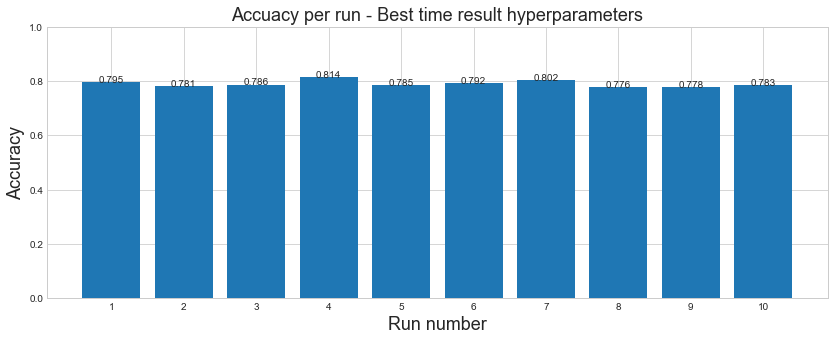

In [127]:

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    x = ['1','2','3', '4' , '5', '6' ,'7' ,'8', '9', '10']
    y =  accuacy_round
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (14, 5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    plt.xlabel("Run number", fontsize=18)
    plt.ylabel("Accuracy" ,  fontsize=18)
    plt.ylim([0, 1])
    plt.title("Accuacy per run - Best time result hyperparameters", fontsize=18)

    # visualizing the plot
    plt.show()

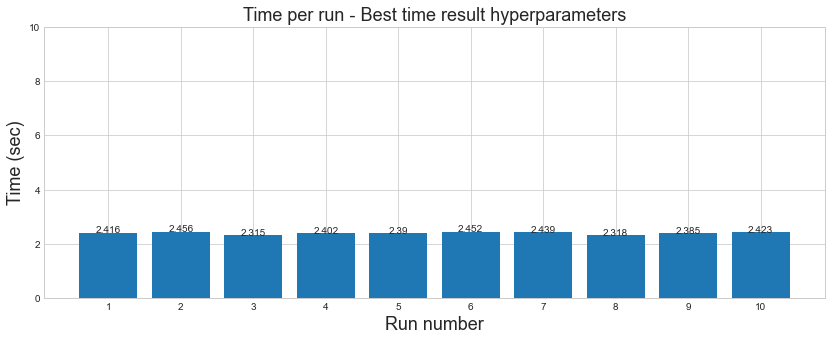

In [128]:

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    x = ['1','2','3', '4' , '5', '6' ,'7' ,'8', '9', '10']
    y =  time_round
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (14, 5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    plt.xlabel("Run number", fontsize=18)
    plt.ylabel("Time (sec)" ,  fontsize=18)
    plt.ylim([0, 10])
    plt.title("Time per run - Best time result hyperparameters", fontsize=18)

    # visualizing the plot
    plt.show()

## Best result from Question 6:

As we can see, the running time in all ten runs where quit the same, thats why we chose yto be the "best result" classified only by its accuracy presentege

In [149]:
accuracy= np.sort(accuracy)
Best_result_6 = accuracy[len(accuracy) - 1]
Best_result_6
#Remider:
#Hyperparameter :
#number of leaves: 10

0.8135812580424147

<div id="sklearn">
    <h2>Question 7: sklearn nearest neigbor</h2>
</div>

Here we are using our own implementation of KNN, and sklearn's implementation of the RKDT,in order to cheak if our algorithm does accually returns the best and closest neighbor there is (according to our accuracy messurment implemented in Q3).
As the results shows, the epsilon in all the hyperparamete's combinations is equal to 0, which means the accuracy is in fact 100% as acpected.
also, this mean sklearn's ANN algorithm is also 100% accurate 🎉

In [143]:
from timeit import default_timer as timer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
X = X_train_Hananya1.values

best_e = None
best_leaf = None
best_time = None
times = []
num_leavs = []
epsilon_val =[]

for leaf_s in range(20, 100, 20):
    num_leavs.append(leaf_s)
    begin =  timer()
    ann_neigh = NearestNeighbors(n_neighbors=1, radius=0.4, algorithm='kd_tree', leaf_size=leaf_s)
    ann_neigh.fit(X)
    neighbors = ann_neigh.kneighbors(X_test_Hananya2.values, return_distance=True)
    distances, index = neighbors
    end =  timer()
    times.append(end - begin)
    s = 0 
    for d_sklearn, d_knn in zip(distances, prediction):
        s += np.sum(d_sklearn/d_knn)
    epsilon = s / distances.size -1
    epsilon_val.append(epsilon)
   
    # if best_time is None or (end-begin)<best_time:
    if best_e is None or epsilon < best_e:
        best_e = epsilon
        best_leaf = leaf_s
        best_time = end - begin
       

num_leavs = pd.DataFrame(num_leavs)
times = pd.DataFrame(times)
epsilon_val = pd.DataFrame(epsilon_val)
sklrn_results = pd.concat([num_leavs ,times ,epsilon_val], axis=1)
sklrn_results.columns =['num_leavs','times', 'epsilon_val']
sklrn_results

,num_leavs,times,epsilon_val
0,20,0.133375,0.0
1,40,0.100298,0.0
2,60,0.086419,0.0
3,80,0.086484,0.0


Here we present purely the sklearn's algoritm's accuracy, according to our accuracy messurment.
This will use use for comparisons between our implementation of the ANN algorithm and sklearn's:

In [147]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
X = X_train_Hananya1_ANN.values
# X_test_Hananya2_ANN
best_e = None
best_leaf = None
best_time = None
times = []
num_leavs = []
epsilon_val =[]
for leaf_s in range(10, 100, 10):
    num_leavs.append(leaf_s)
    begin = timer()
    neigh = NearestNeighbors(n_neighbors=1, radius=0.4, algorithm='brute')
    ann_neigh = NearestNeighbors(n_neighbors=1, radius=0.4, algorithm='kd_tree', leaf_size=leaf_s)
    neigh.fit(X)
    ann_neigh.fit(X)
    neighbors = neigh.kneighbors(X_test_Hananya2_ANN.values, return_distance=True)
    distances, index = neighbors
    ann_neighbors = neigh.kneighbors(X_test_Hananya2_ANN.values, return_distance=True)
    distances_ann, index = ann_neighbors
    # print(distances, neighbors)
    end = timer()
    times.append(end - begin)
    s = 0 
    for d_sklearn, d_knn in zip(distances_ann,distances):
        s += np.sum(d_sklearn/d_knn)
    epsilon = s / distances.size -1
    epsilon_val.append(epsilon)
     # if best_time is None or (end-begin)<best_time:
    if best_e is None or epsilon < best_e:
        best_e = epsilon
        best_leaf = leaf_s
        best_time = end - begin
       
  # print(best_e, best_leaf, best_time, times)
num_leavs = pd.DataFrame(num_leavs)
times = pd.DataFrame(times)
epsilon_val = pd.DataFrame(epsilon_val)
sklrn_results = pd.concat([num_leavs ,times ,epsilon_val], axis=1)
sklrn_results.columns =['num_leavs','times', 'epsilon_val']
sklrn_results

,num_leavs,times,epsilon_val
0,10,0.029690,0.0
1,20,0.025083,0.0
2,30,0.022686,0.0
3,40,0.022784,0.0
4,50,0.020516,0.0
5,60,0.020718,0.0
6,70,0.023146,0.0
7,80,0.021454,0.0
8,90,0.022916,0.0


## Comparison between sklearn's result and best result from question 6 :

### From the table we can make a comparrison between our best result in question 6 and sklearn's result:

#### sklearn:

Accuracy 100% ; Time: 0.0296 sec

#### Best of question 6:

Accuracy 81% ; Time:2.4 sec


### Testing:
We tried using sklearn's scorring messurment, using grid serch for optimising the parameters. 
But this optimizing algorithm requiers classification for classes.
In our case we do not have classifications to classes, therefore this messurment is not suitable for our data.
That is why we compared our accuary and running time, using our own build accuracy and running time messurments. 

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
'C': [1,2,3,300,500], # what is c??
'max_iter': [100,100]}]

clf = GridSearchCV(
        SVC(), parameters, scoring='accuracy'
    )
clf.fit(X, y)

print(clf.best_params_)